In [1]:
#izbaciti feature koji koreliraju vise od 99%, drugi scenarij izbaciti gdje je vise od 95% --> usporediti rezultate, uzeti bolji scenarij

# Matrica korelacija

In [1]:
import sys
sys.path.append('../src')
from modules import *

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('../../data/solubility_features.csv', index_col=0)

In [3]:
num_bins = 20  # Or choose a number based on your data distribution
bins = pd.cut(data['Solubility'], bins=num_bins, labels=False)
data['solubility_bins'] = bins

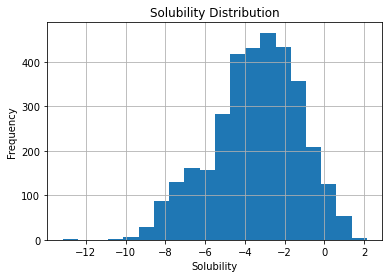

In [4]:
data['Solubility'].hist(bins=num_bins)
plt.title('Solubility Distribution')
plt.xlabel('Solubility')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Creating quantile-based bins for stratification
num_bins = 5  # Adjust as needed
data['solubility_bins'] = pd.qcut(data[target], q=num_bins, labels=False, duplicates='drop')

# Assuming 'final_data' is your DataFrame
features = data.columns[3:-1]
target = 'Solubility'

# Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, stratify=data['solubility_bins'], random_state=42)

# Splitting the data with stratification
#X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, stratify=data['solubility_bins'], random_state=42)

# You also need to stratify the second split
train_bins = pd.cut(y_train, bins=num_bins, labels=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, stratify=train_bins, random_state=42)

# Training the XGBoost model
model = xgb.XGBRegressor(n_estimators=110, learning_rate=0.15, max_depth=8)
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculating R^2 Score
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

NameError: name 'target' is not defined

In [6]:
kols=data.columns[3:]
df=data.loc[:,kols]

In [7]:
corr = df.corr()
corr

,logp,molwt,balabanj,tpsa,0,1,2,3,4,5,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,solubility_bins
logp,1.000000,0.482102,-0.062719,-0.297486,-0.055111,0.022473,0.031494,0.048574,-0.023224,-0.026208,...,-0.042737,-0.002540,-0.023739,-0.013464,-0.126412,-0.011210,-0.006263,-0.043873,-0.013476,-0.704829
molwt,0.482102,1.000000,-0.282367,0.604473,0.027559,0.035784,-0.019988,0.146933,-0.069363,0.127291,...,-0.019224,0.019405,-0.009746,0.012849,0.102624,0.057604,0.056109,-0.053129,0.053780,-0.487438
balabanj,-0.062719,-0.282367,1.000000,-0.137707,-0.027693,0.192148,-0.144213,-0.147483,-0.207403,-0.125492,...,-0.018811,-0.033526,0.036433,-0.027845,-0.515074,-0.079823,-0.049844,0.030041,-0.054696,0.211080
tpsa,-0.297486,0.604473,-0.137707,1.000000,0.068296,0.066908,-0.029281,0.114626,-0.086380,0.123669,...,0.013008,0.040414,0.035811,0.018412,0.096195,0.041450,0.041901,-0.042954,0.075651,0.052858
0,-0.055111,0.027559,-0.027693,0.068296,1.000000,0.004151,-0.022907,0.006590,-0.019868,0.100744,...,0.075757,-0.009030,0.000302,-0.012181,0.045999,-0.017603,0.009505,-0.022389,0.015751,0.023900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,-0.011210,0.057604,-0.079823,0.041450,-0.017603,-0.011839,-0.024405,-0.022686,0.039521,-0.021251,...,-0.017280,-0.009352,0.048200,-0.012616,0.104915,1.000000,-0.013872,0.098225,0.040598,-0.015866
1021,-0.006263,0.056109,-0.049844,0.041901,0.009505,-0.033566,-0.013395,0.000702,-0.002164,0.002943,...,-0.013148,0.078048,-0.024987,-0.009599,-0.035342,-0.013872,1.000000,-0.017644,0.025205,-0.010371
1022,-0.043873,-0.053129,0.030041,-0.042954,-0.022389,-0.019644,-0.012875,-0.006959,-0.019907,-0.027029,...,-0.007771,0.014056,0.252957,0.003268,0.049213,0.098225,-0.017644,1.000000,-0.014889,0.046852
1023,-0.013476,0.053780,-0.054696,0.075651,0.015751,-0.023035,0.022235,-0.014567,-0.010935,0.008935,...,-0.011095,-0.006005,0.034260,-0.008100,0.048978,0.040598,0.025205,-0.014889,1.000000,-0.019429


0.0


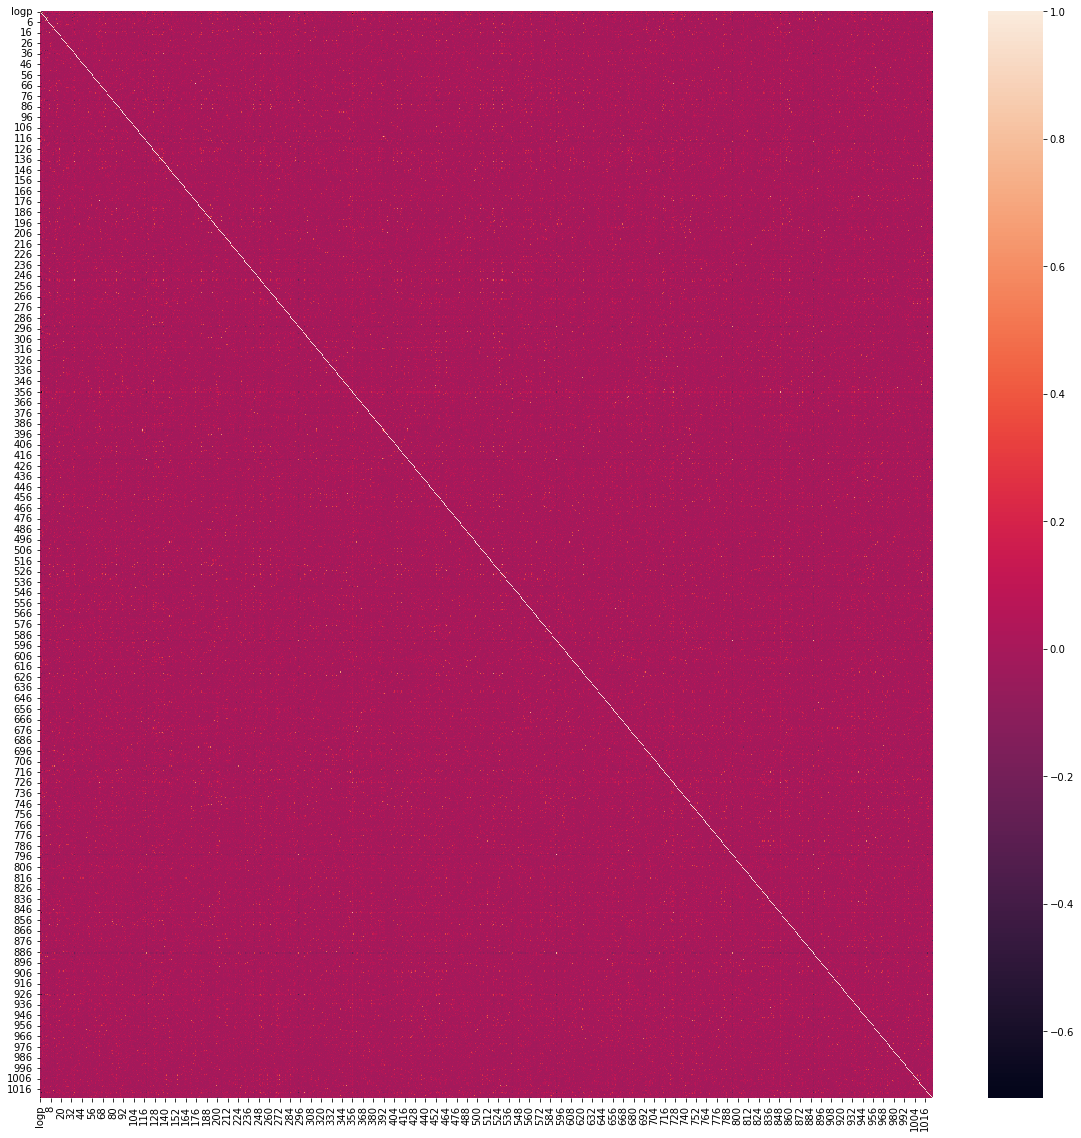

In [8]:
plt.figure(figsize=(20, 20))

sns.heatmap(corr)
plt.show()

In [9]:
# Stvorite gornji trokut korelacijske matrice (da biste izbjegli dupliciranje)
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Pronađite parove značajki s korelacijom većom od 99%
highly_correlated_pairs = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

# Ispišite parove značajki s visokom korelacijom
print(highly_correlated_pairs)


['175', '794']


In [10]:
high_corr_var = np.where(corr > 0.80)
high_corr_var = [(corr.columns[x], corr.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
high_corr_var

[('64', '175'), ('591', '794')]